Contour 
 ------------
 This notebook provides an overview of the contour methods implemented in PyFloc.

## Libraries

In [1]:
%matplotlib notebook
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
import contour

## Datasets

Here it is possible to choose the dataset to test the algorithms

### Parameters

**kind**: kind of dataset to create. It is possibile to choose between *circles, moons, blobs, gates*; <br>
**n_samples** (int): number of samples per class; <br>
**n_samples_rare** (int): number of samplest per rare class. <br>

### Returns 
**X** (ndarray): data; <br>
**y** (array): labels. 

In [2]:
X = contour.make_data('moons',1000)

Contour using multi-gaussians
------------------------------------

Trace the contour using a multi-gaussian approach

### Parameters of the constructor
**X** (ndarray): data; <br>
**n_gaussians** (int): number of gaussians used to fit the distribution of samples; <br>
**prob_target** (float): the gate will include the region with this probability; <br>
**n_bins** (list): number of bins along x and y.

### Parameters of run
**n_points** (int): number of points in the contour; <br>
**max_iter** (int): maximum number of iterations; <br>
**stride_show** (int): plot contour every stride_show iterations; <br>
**tol** (float): stop when the sum of the target function along the contour is below tol.

In [ ]:
C = contour.Contour(X, n_gaussians = 10, prob_target = 0.99, n_bins = [100,100])
C.run(n_points = 20, max_iter = 10000, tol = 1e-1)

Contour using raw density histogram
-------------------------------------------

Trace the contour using a density based approach

### Parameters of the constructor
**H** (ndarray or None): the grayscale image, binary matrix or numeric matrix to analyze. Can be None if data is not None; <br>
**data** (ndarray or None): data. Can be None if H is not None; <br>
**density_threshold** (float or None): threshold to estabilish how wide will be the contour. If None, it will be calculated automatically. We suggest to use small values (1e-6, 1e-5, 1e-4); <br>
**n_bins** (list): number of bins along x and y;
**starting_point** (list or None): the starting point which belongs to the cluster you want to find the contour. We suggest to use the cluster center. If None, it will be set randomly; <br>
**exclude_borders** (bool): decides if the points in the border of the image will be included in the analysis; <br>
**mode** (str): decides whether the density threshold is an upper bound (*above*) or a lower bound (*below*). <br>


### Parameters of run
**take_inside** (bool): decides if all the element inside the external contour will be taken as valid (*True* in cluster analysis); <br>
**diagonals** (bool): whether to consider the diagonal points as neighbors or not; <br>
**min_threshold** (float in [0,1]): to be considered as valid, the contour has to respect the threshold of the taken valid points over the total valid points. 

Using density_threshold =  1e-05


<IPython.core.display.Javascript object>


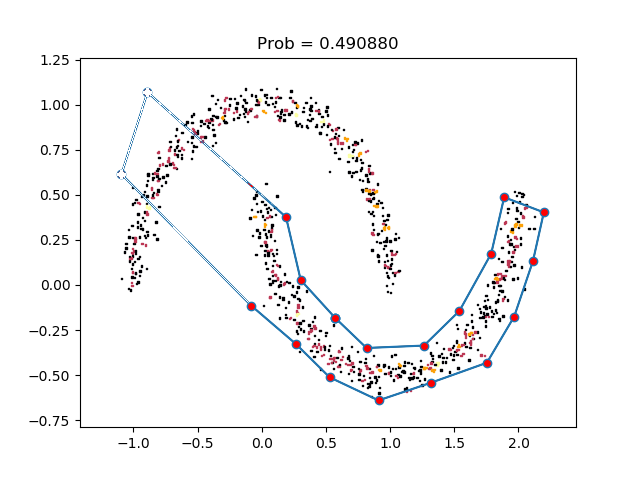

In [3]:
C = contour.Cherry(data = X, density_threshold = None
                   , n_bins = [100, 100], starting_point = None
                   , exclude_borders = False, mode='above')
C.run(take_inside = True, diagonals = False, min_threshold = 0.3)

Contour conversion and plotting
-------------------------------------------

Convert in analogic the digital contour and the digital data inside the contour, and plot them

<IPython.core.display.Javascript object>


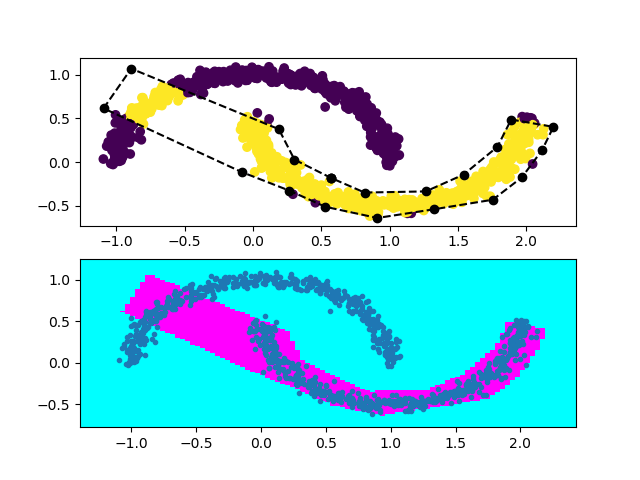

In [5]:
C.get_polygon_refined()
inside = C.get_mask_inside_polygon()
data_inside = C.get_index_inside_polygon()
f = plt.figure()
ax1 = f.add_subplot(211)
ax1.scatter(C.data[:,0],C.data[:,1], c = data_inside)
ax1.plot(C.xc, C.yc,'o--k')
ax2 = f.add_subplot(212)
ax2.plot(C.data[:,0],C.data[:,1],'.')
ax2.pcolormesh(C.X, C.Y, inside, cmap = plt.get_cmap('cool'))
plt.show()